1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


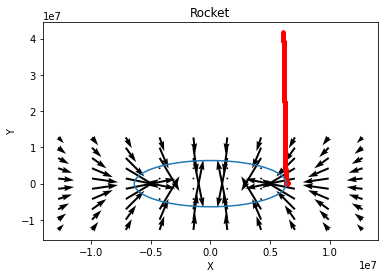

In [21]:
# import necessary modules
import numpy as np
import matplotlib.pyplot as plt

################################################
# Calculate the gravity at a point             #
# Inputs:                                      #
#  - point_pos - position of the point         #
#  - r - radius of the mass                    #
#  - m - mass of the mass                      #
#  - G - gravitational constant                #
#  - mass_pos - position of the mass           #
# Outputs:                                     #
#  - gravity if the point is above the surface #
#  - None otherwise                            #
################################################
def gravityField(point_pos, r=6378.1e3, m=5.97219e24, G=6.67e-11, mass_pos=np.array([0,0])):
    rel_pos = point_pos - mass_pos
    xp = rel_pos[0]
    yp = rel_pos[1]
    
    # Check if the point is inside the earth and return None if it is
    if xp**2 + yp**2 < r**2:
        #return None
        return(0,0)
    
    # Else return the actual value
    g_mag = G * m/(xp**2 + yp**2)
    return (g_mag*-xp/(xp**2+yp**2)**0.5, g_mag*-yp/(xp**2+yp**2)**0.5)

##################################################
# Calculate drag at a point                      #
# Inputs:                                        #
#  - point_pos - position of the point (m)       #
#  - point_vel - velocity of the point (m/s)     #
#  - A - cross-sectional area of the point (m*m) #
#  - r - radius of the mass (m)                  #
#  - cd - coefficient of drag                    #
#  - mass_pos - position of the mass             # 
# Outputs:                                       #
#  - drag if the point is above the surface      #
#  - None otherwise                              #
##################################################
def dragField(point_pos, point_vel, A=(3.7/2)**2*np.pi, r=6378.1e3, cd=0.3, mass_pos=np.array([0,0])):
    # Calculate the height (distance from center of the earth minus radius of the earth
    rel_pos = point_pos - mass_pos # m
    h = np.sqrt(np.sum(rel_pos**2)) - r # m
    
    # Implement piece-wise function for density based on https://www.grc.nasa.gov/www/k-12/rocket/atmosmet.html
    # h < 11 km
    if h < 11000:
        temp = 15.04 - 0.00649*h # C
        pres = 101.29 * ((temp + 273.1)/288.08)**5.256
    # 11 km < h < 25 km
    elif h < 25000:
        temp = -56.46
        pres = 22.65 * np.exp(1.73 - 0.000157*h)
    # Zero point for drag, zero pressure sets entire density equation to zero
    else:
        temp = 1
        pres = 0
    
    # Calculate density
    p = pres / (0.2869 * (temp + 273.1))
    
    # Calculate the force of drag (see falling sphere assignment)
    return cd * A * p * point_vel**2 / 2

r_earth = 6378.1e3 # m

# properties of our rocket
m_fuel_in = 395700.0 * 3 #kg
m_fuselage = 25600.0 * 3 #0.0255 - m_fuel_in #kg
m_payload = 1000.0 #kg

# properties of thrust
thrustTime = 162.0 #s #the time the rocket is getting thrust force directly
tTime = 397.0
dm = m_fuel_in / (thrustTime + tTime + 200) #kg/s # dm/dt the fuel usage rate
thrust = np.array([7607000 * 3.0,0.0]) #N #The thrust of the rocket
thrust2 = np.array([981000.0, 0.0])

m = m_fuselage + m_fuel_in + m_payload # calc. the total initial mass

# define our simulation
t = 0.0
dt = 0.1 #s our time step
# initialize variables
pos = np.array([r_earth,0.0])
vel = np.array([0.0,0.0])
t = 0.0
accel = np.array([0.0,0.0])
# max sim length
t_f = 40000.0 #s

# other constants
g = 9.8 #m/s/s

# initialize lists for plotting
x_list = [pos[0]]
y_list = [pos[1]]
t_list = [t]
mass_list = [m]
vx_list = [vel[0]]
vy_list = [vel[1]]
ax_list = [accel[0]]
ay_list = [accel[1]]

# drag variables
drag = 0.0 # kg*m/s/s # initialize variable
radius = 0.945 * 0.0254 / 2 # m 
area = np.pi * radius ** 2.0 # cross sectional area of cone is pir^2
dcoe = 0.3 # drag coefficient of cones
adensity = 1.225 # kg/m^3
theta = 0
# main function loop
gList = []
gList2 = []
while t < (tTime + thrustTime): # run for allotted simulation time at max
    # force calc for when thrust is running
    gForce = gravityField(pos)
    gList.append(gForce[0])
    gList2.append(gForce[1])
    dragForce = dragField(pos, vel)
    if t < thrustTime: #m > (m_fuselage + m_payload):
        thrust[0] = 7607000.0 * 3 * np.cos(theta)
        thrust[1] = 7607000.0 * 3 * np.sin(theta)
        theta += (np.pi/8 * 16200)
        #drag = (dcoe)*(area)*adensity * np.sign(v) * 0.5 * v * v
        F = thrust + np.array([m,m]) * (gForce) + dragForce # force calc.
        m -= dm * dt
        accel = F / m
        # acceleration based function
        vel += accel * dt
        pos += vel * dt
        t += dt
    # force calc for no thrust
    elif thrustTime < t < (tTime + thrustTime):
        thrust2[0] = 981000 * np.cos(theta)
        thrust2[1] = 981000 * np.sin(theta)
        F = thrust2 + np.array([m,m]) * (gForce) + dragForce
        theta += (10/16200)
        m -= dm * dt
        accel = F / m
        # acceleration based function
        vel += accel * dt
        pos += vel * dt
        t += dt
    else: 
        break
        #drag = (dcoe)*(area)*adensity*np.sign(v)*v*v*0.5
        F = np.array([m,m]) * (gForce) + dragForce
        accel = F / m
        # acceleration based function
        vel += accel * dt
        pos += vel * dt
        t += dt
    # append to lists

    x_list.append(pos[0])
    vx_list.append(vel[0])
    ax_list.append(vel[0])
    y_list.append(pos[1])
    vy_list.append(vel[1])
    ay_list.append(accel[1])
    mass_list.append(m)
    t_list.append(t)
#     if pos[1] < 0:
#         break

# Plot the height of the rocket
        
plt.plot(x_list, y_list, 'r.')
# plt.plot(t_list, x_list, 'b')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Rocket')

# print(R)
# print(Theta)

#############################################################
# Create x and y lists to draw earth at a point             #
# Inputs:                                                   #
#  - r - radius of the earth                                #
#  - num_angles - the number of angles to sample x and y at #
#  - pos - the position of the earth                        #
# Outputs:                                                  #
#  - x - x coordinates for the earth at all sample angles   #
#  - y - y coordinates for the earth at all sample angles   #
#############################################################
def genEarthLists(r=6378.1e3, num_angles=361, pos=np.array([0,0])):
    angles = np.linspace(0, 2*np.pi, num_angles)
    return r*np.cos(angles) + pos[0], r*np.sin(angles) + pos[1]

##########################################################################
# Create x, y, gx, and gy lists for a vector field with vectors at (x,y) #
# and that point with direciton (gx, gy)                                 #
# Inputs:                                                                #
#  - r - radius of the arth                                              #
#  - num_x_points - number of points to sample in the x direction        #
#  - num_y_points - number of points to sample in the y direction        #
#  - width_radius_ratio - the ratio between the width of the sample      #
#    space and the radius (ex. 4 means it will sample from -2r to 2r)    #
#  - height_radius_ratio -  the ratio between the height of the sample   #
#    space and the radius (ex. 4 means it will sample from -2r to 2r)    #
# Outputs:                                                               #
#  - X - x meshgrid from combining x and y sample points                 #
#  - Y - y meshgrid from combining x and y sample points                 #
#  - gx - x component of each vector at each point in space              #
#  - gy - y component of each vector at each point in space              #
##########################################################################
def genGravityLists(r=6378.1e3, num_x_points=10, num_y_points=10, width_radius_ratio=4, height_radius_ratio=4):
    # Generate x and y lists
    x = np.linspace(-(width_radius_ratio/2)*r, (width_radius_ratio/2)*r, num_x_points)
    y = np.linspace(-(height_radius_ratio/2)*r, (height_radius_ratio/2)*r, num_y_points)
    
    # Generate meshgrids for x and y
    X, Y = np.meshgrid(x,y)
    
    # Initialize vector components
    gx = np.zeros(X.shape)
    gy = np.zeros(Y.shape)
    
    # Get the gx and gy components at each sample point
    for i in range(X.shape[0]):
        for j in range(X.shape[0]):
            gx[i,j], gy[i,j] = gravityField(np.array([X[i,j], Y[i,j]]), r=r)
    
    return X, Y, gx, gy

X, Y, gx, gy = genGravityLists()
plt.quiver(X, Y, gx, gy)

earth_x, earth_y = genEarthLists()
plt.plot(earth_x, earth_y)

# # Plot the velocity of the rocket

# print(gList)
# print(gList2)

# plt.plot(t_list, v_list, 'b')
# plt.xlabel('Time (s)')
# plt.ylabel('Velocity (m/s)')
# plt.title('Y-Axis Velocity of the Rocket')
# plt.show()

# # Plot the acceleration of the rocket

# plt.plot(t_list, a_list, 'g')
# plt.xlabel('Time (s)')
# plt.ylabel('Acceleration (m/s/s)')
# plt.title('Y-Axis Acceleration of the Rocket')
# plt.show()

# # Plot the masses of the rocket against the time

# plt.plot(t_list, mass_list)
# plt.xlabel('Time (s)')
# plt.ylabel('Distance (m)')
# plt.title('Position of two particles')
# plt.show()

# print('The flight duration of the rocket was ' + str(t) + ' seconds')
# print('The maximum height the rocket reached ' + str(max(y_list)) + ' meters')